# STINTSY Machine Project

**SS1 - Group 3**
1. BERENGUER, Beatrice A.
2. BUENDIA, Leigh Arriane S.
3. ENRIQUEZ, Manolo L.

**<h2> Description of the Task**

To create a machine learning model that will classify whether the smoke detector should be triggered or not

**<h2> List of Requirements**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**<h2> Description of the Dataset**

https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

Collection of training data is performed with the help of IOT devices since the goal is to develop a AI based smoke detector device. Many different environments and fire sources have to be sampled to ensure a good dataset for training. A short list of different scenarios which are captured:

* Normal indoor
* Normal outdoor
* Indoor wood fire, firefighter training area
* Indoor gas fire, firefighter training area
* Outdoor wood, coal, and gas grill
* Outdoor high humidity etc.



In [2]:
data=pd.read_csv('smoke_detection_iot.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
data.shape

(62630, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
data.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

**<h2> Data Preprocessing and Cleaning**

In [6]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62625    False
62626    False
62627    False
62628    False
62629    False
Length: 62630, dtype: bool

In [8]:
data.drop(['Unnamed: 0', 'UTC'], axis = 1, inplace = True)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [9]:
X = data.drop(['Fire Alarm'], axis = 1)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [10]:
y = data['Fire Alarm']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

In [11]:
scale = MinMaxScaler()

In [66]:
X = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.480574,0.750539,0.000823,0.000000,0.804524,0.772333,0.933397,0.000077,0.000042,0.000099,0.000040,0.000002,0.081883
1,0.602282,0.657762,0.019467,0.000207,0.723094,0.670844,0.668466,0.000181,0.000100,0.000234,0.000094,0.000005,0.685410
2,0.219663,0.662857,0.002419,0.000379,0.680944,0.874171,0.236485,0.000204,0.000113,0.000265,0.000106,0.000006,0.072716
3,0.514155,0.752614,0.018617,0.007086,0.697695,0.674226,0.736171,0.000217,0.000120,0.000279,0.000112,0.000006,0.500804
4,0.499426,0.718231,0.002878,0.000000,0.811960,0.771505,0.947028,0.000079,0.000044,0.000103,0.000041,0.000002,0.119816


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [75]:
smote = SMOTE()

In [76]:
y_train.value_counts()

0    57
1    39
Name: Fire Alarm, dtype: int64

In [77]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [78]:
y_train.value_counts()

0    57
1    57
Name: Fire Alarm, dtype: int64

**<h2> Exploratory Data Analysis**

In [79]:
# Import Data Visualization Tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will be using 15% of our data for testing and 85% of our data for training. The figure below shows a pie chart of how much will be used for training and testing. The values in the pie chart are 82.6% for training and 17.4% for testing, this is because of the 

[114, 24]


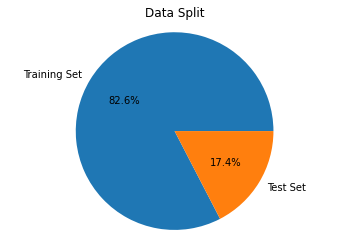

In [80]:
fig, ax = plt.subplots()
ax.pie([X_train.shape[0],X_test.shape[0]], labels=["Training Set", "Test Set"], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Data Split')
print([X_train.shape[0],X_test.shape[0]])

During data pre-processing and cleaning, we used `SMOTE (Synthetic Minority Oversampling Technique)` in the training dataset which creates a balance in the dataset. The chart below shows that the labels are 50/50 which means that the training dataset has the same amount of number per class. Therefore, models are now easier to train since this prevents becoming biased towards one class.

Text(0.5, 1.0, 'Training Set Labels')

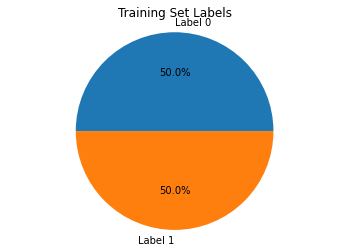

In [20]:
fig, ax = plt.subplots()
ax.pie([y_train.value_counts()[0],y_train.value_counts()[1]], labels=["Label 0", "Label 1"], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Training Set Labels')

The chart below shows that there are more `Label 0` than `Label 1`. This is because we do not need to balance it since we are already dealing with the test data which should be authentic in order to test if our model really is accurate. The chart below shows the data of how many rows there are per class which are 28.8% for `0` (No fire detected) and 71.2% for `1` (Fire detected).

Text(0.5, 1.0, 'Test Set Labels')

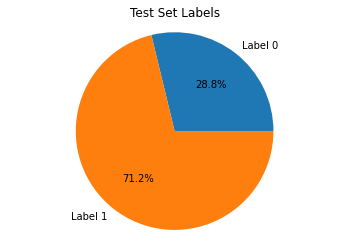

In [21]:
fig, ax = plt.subplots()
ax.pie([y_test.value_counts()[0],y_test.value_counts()[1]], labels=["Label 0", "Label 1"], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Test Set Labels')

The table below shows the basic statistic for our training dataset.

In [22]:
X_train.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,7.167200e+04,71672.000000
mean,0.476520,0.560493,0.044233,0.005788,0.721751,0.745187,0.845899,0.010001,0.005633,0.011676,0.005428,3.573754e-03,0.323125
std,0.178575,0.158619,0.167491,0.037059,0.103687,0.120883,0.147627,0.075896,0.049404,0.084444,0.048323,3.978642e-02,0.296475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.416549,0.544696,0.001117,0.000000,0.678120,0.677335,0.733489,0.000062,0.000020,0.000100,0.000018,7.659916e-07,0.085004
50%,0.515499,0.594477,0.004400,0.000000,0.717065,0.756555,0.878455,0.000123,0.000040,0.000197,0.000036,1.432071e-06,0.193699
75%,0.586730,0.653894,0.019433,0.000480,0.782330,0.809002,0.970918,0.000143,0.000047,0.000230,0.000042,1.665199e-06,0.551714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998917,1.000000,1.000000,1.000000,1.000000e+00,1.000000


The table below shows the basic statistic for our test dataset.

In [23]:
X_test.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000
mean,0.464844,0.586315,0.034599,0.004559,0.724818,0.727134,0.863081,0.007336,0.004142,0.008545,0.003993,0.002637,0.420469
std,0.174468,0.137481,0.136697,0.030984,0.088136,0.101993,0.145482,0.065182,0.043231,0.071659,0.042347,0.035425,0.303578
min,0.000000,0.000465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.406523,0.570897,0.002233,0.000000,0.689633,0.675693,0.871129,0.000088,0.000029,0.000141,0.000026,0.000001,0.145121
50%,0.514523,0.611542,0.016467,0.000000,0.719298,0.686526,0.883783,0.000126,0.000041,0.000202,0.000037,0.000001,0.373285
75%,0.578228,0.659789,0.019850,0.000638,0.778309,0.781224,0.950355,0.000146,0.000048,0.000234,0.000043,0.000002,0.684622
max,1.000000,1.000000,1.000000,0.695201,0.999362,0.998523,0.999445,1.000000,0.990890,1.000000,0.990353,0.985488,0.999920


The table below shows the basic statistic for our original dataset.

In [24]:
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


**<h2> Model Training**

<h3> Binomial Logistic Regression

In [25]:
logreg = SGDClassifier(loss='log_loss', eta0=0.001, learning_rate='optimal', random_state=1, verbose=0)
max_epochs = 200

In [26]:
class DataLoader(object):

    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        self.indices = np.array([i for i in range(self.X.shape[0])])
        print(self.X.iloc[0])
        np.random.seed(1)

    def shuffle(self):
        np.random.shuffle(self.indices)

    def get_batch(self, mode='train'):
        X_batch = []
        y_batch = []

        if mode == 'train':
            self.shuffle()
            
        elif mode == 'test':
            self.indices = np.array([i for i in range(self.X.shape[0])])

        for i in range(0, len(self.indices), self.batch_size):
            if i + self.batch_size <= len(self.indices):
                indices = self.indices[i:i + self.batch_size]
            else:
                indices = self.indices[i:]

            X_batch.append(self.X.iloc[indices])
            y_batch.append(self.y.iloc[indices])

        return X_batch, y_batch

In [27]:
data_loader = DataLoader(X=X_train, y=y_train, batch_size=128)

Temperature[C]    2.065292e-01
Humidity[%]       6.796463e-01
TVOC[ppb]         3.700000e-03
eCO2[ppm]         0.000000e+00
Raw H2            7.904306e-01
Raw Ethanol       7.744953e-01
Pressure[hPa]     9.668110e-01
PM1.0             3.069691e-05
PM2.5             9.904856e-06
NC0.5             4.879475e-05
NC1.0             9.014791e-06
NC2.5             3.663438e-07
CNT               2.833193e-01
Name: 0, dtype: float64


In [28]:
from sklearn.metrics import log_loss

e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_train)
print(labels)

while e < max_epochs and is_converged is not True:
    
    loss=0
    
    X_batch,y_batch = data_loader.get_batch()
    
    for X,y in zip(X_batch,y_batch):
        logreg.partial_fit(X,y,classes=labels)
        y_pred = logreg.predict_proba(X_train)
        loss += log_loss(y_train,y_pred)
        
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previous_loss - loss)<0.1:
        is_converged = True
    else:
        previous_loss = loss
        e +=1

[0 1]
Epoch: 1 	Loss: 0.17744817634654822
Epoch: 2 	Loss: 0.14604149847591527
Epoch: 3 	Loss: 0.14529479059539505
Epoch: 4 	Loss: 0.1448033432512076
Epoch: 5 	Loss: 0.1446184482152676
Epoch: 6 	Loss: 0.14444275990321426


In [29]:
predictions = logreg.predict(X_test)
print(predictions)

[0 1 0 ... 1 0 0]


In [30]:
num_correct = np.sum(predictions == y_test)
print(num_correct, 'out of', len(y_test))

11535 out of 12526


In [31]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

92.08845601149609 %


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      3605
           1       0.99      0.90      0.94      8921

    accuracy                           0.92     12526
   macro avg       0.89      0.94      0.91     12526
weighted avg       0.94      0.92      0.92     12526



<h3> Gaussian Naive Bayes

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
predictions = gnb.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
num_correct = np.sum(predictions == y_test)
print(num_correct, 'out of', len(y_test))

10290 out of 12526


In [36]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

82.14912980999522 %


In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [38]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [39]:
gs_NB.best_params_

{'var_smoothing': 0.0002310129700083158}

In [40]:
gs_NB.best_score_

0.8808080354321951

In [41]:
predict_test = gs_NB.predict(Data_transformed)

num_correct = np.sum(predict_test == y_test)

accuracy_test = num_correct / len(y_test) * 100
print(accuracy_test, '%')

88.06482516365959 %


<h3> k Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)

In [43]:
y_train_knn = knn.predict(X_train)

In [44]:
num_correct = np.sum(y_train_knn == y_train)
print(num_correct, 'out of', len(y_train))

71666 out of 71672


In [45]:
accuracy = num_correct / len(y_train) * 100
print(accuracy, '%')

99.99162852996987 %


In [46]:
y_test_knn = knn.predict(X_test)

In [47]:
printClassificationReport = classification_report(y_test, y_test_knn)
print(printClassificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [48]:
num_correct = np.sum(y_test_knn == y_test)
print(num_correct, 'out of', len(y_test))

12525 out of 12526


In [49]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

99.99201660546065 %


#### Cross-Validation

In [50]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [51]:
k_fold = 10
predictions = cross_val_predict(knn.fit(X_train,y_train), X, y, cv=k_fold)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print(accuracy_score(y, predictions))

0.975


In [54]:
scores = cross_val_score(knn.fit(X_train,y_train), X, y, cv=k_fold)

In [55]:
print("Scores per fold :\n" + str(scores))
print("Average accuracy : " + str(np.sum(scores) / len(scores)))

Scores per fold :
[1.         1.         1.         0.91666667 0.91666667 1.
 0.91666667 1.         1.         1.        ]
Average accuracy : 0.975


**<h2> Hyperparameter Tuning**



**<h2> Model Selection**

**<h2> Insights and Conclusion**

**<h2> References**